## Logistic regression

In the first part of this exercise, we'll build a logistic regression model to predict whether a patient will going to get a cardiac arrest.  Suppose that you are a cardiologist and you want to determine each patient's chance of getting a heart attack based on the body measurments. You have historical data from previous patients that you can use as a training set for logistic regression.  To accomplish this, we're going to build a classification model that estimates the probability of admission based on the exam scores. Use the `heart.csv` dataset that comes with the exercises.

Let's start by examining the data.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
#Import the data into pandas
df = pd.read_csv("C:/Users/amand/OneDrive/ITU/SUMMER 2025/Applied AI/05_Exercises/AI25_ex02_regression/heart.csv")
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000



## Explore the data a bit.
### List:

1.   First few rows
2.   Basic statistic
3.   .info()
4.   Column names

Questions:

1. What is the dependent variable (column name)?
2. What are the independent variables?
3. Should we normalize the data?
4. What are the column data-types?

In [12]:
columns = df.columns
first5 = df.head(5)
first10 = df[:5]
columnstype = df.dtypes

print("1.The dependent variable is target")
print("2.The independent variables are all the others")
print("3.Yes, because we need all the data to be in the same range")
print("4.The column types are \n", columnstype)

print("Here are the first few lines in the data \n")
first10

# Important Formula for normalizing the data between 0-1

max = df.max()
min = df.min()

df_norm = (df - min) / (max - min)
df_norm

1.The dependent variable is target
2.The independent variables are all the others
3.Yes, because we need all the data to be in the same range
4.The column types are 
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object
Here are the first few lines in the data 



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000,0.0
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000,0.0
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000,0.0
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000,0.0


# Exploratory Data Analysis (EDA)

Create some simple plots to check out the data!

1.   Plot the pairwise scatter-plot between each column
2.   Plot the distribution of the values of the dependent variable
3.   Plot the pairwise correlation heatmap of each column.

Answer questions:

1.  What are the assumptions of the logistic regression model?
2.  Can we accept the basic assumptions of the logistic regression model?
3.  Judging by the scatter-plots, do you see any patterns in the data?
4.  Judging by the correlation heat-map, is there correlation between the dependent variable and the independent variables?
5.  Are there correlations among independent variables?

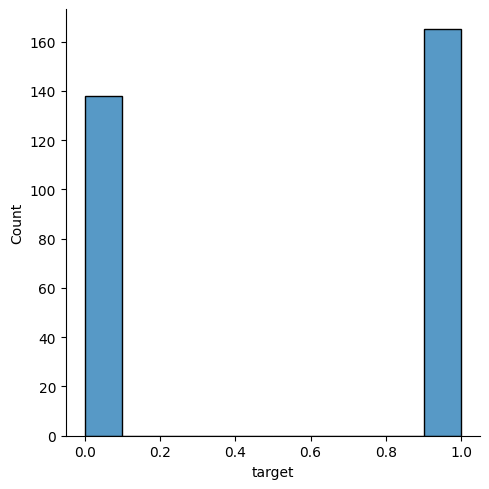

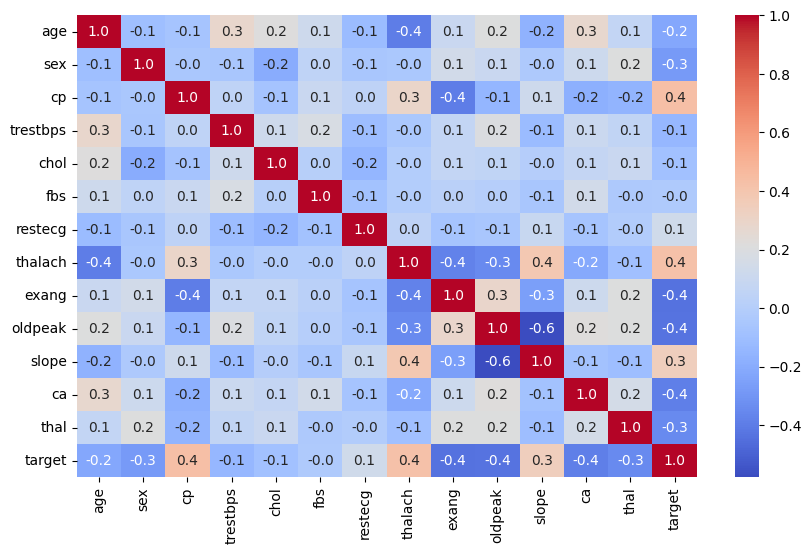

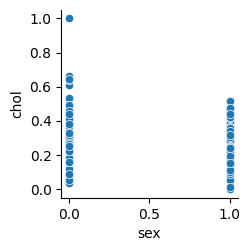

In [13]:
# PLT plot:
import seaborn as sns
#pairplot = sns.pairplot(data = df_norm)
#pairplot.savefig(fname = "pairplot_export")

target_distribution = sns.displot(df_norm["target"])
# Values close to 1 and to -1 are the strongest ones

correlation = df_norm.corr()

plt.figure(figsize=(10,6)) 
sns.heatmap(correlation, cmap='coolwarm',annot = True, fmt = ".1f")
plt.show()


sns.pairplot(df_norm,x_vars = ["sex"], y_vars= ["chol"] )

# seaborn documentation has really good examples



What are the assumptions of the logistic regression model?
2.  Can we accept the basic assumptions of the logistic regression model?
3.  Judging by the scatter-plots, do you see any patterns in the data?
4.  Judging by the correlation heat-map, is there correlation between the dependent variable and the independent variables?
5.  Are there correlations among independent variables?

There is correlation between exang, oldpeak, ca, cp and the target.
The closest to 1 means that they increase in the same proportion.
The closes to -1 is that they increase in opposite relation.


First we need to create a sigmoid function.

Task:
1.  Implement the function

In [14]:
def sigmoid(z):
   e = np.exp(-z)
   return  1 / (1 + e)

Make sure the function is correctly implemented.

Task:
1.  Plot the function.

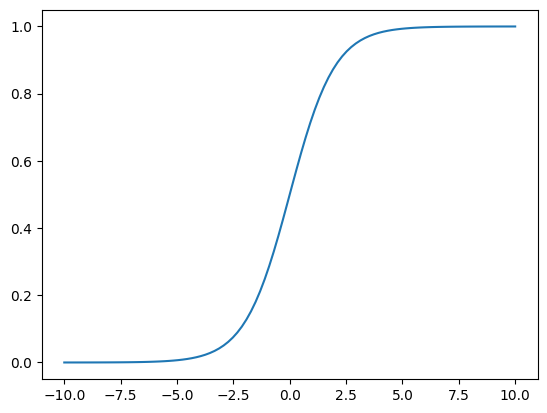

In [15]:
# Create a random database with 100 points.
values = np.linspace(-10,10,100)

plt.plot(values, sigmoid(values))


Task:
1. Write the cost function to evaluate a solution.

In [16]:
def cost(y_true,y_pred):
    epsilon = 1e-15
    y_pred = np.clip (y_pred,epsilon, 1- epsilon)
    loss = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1-y_pred)).mean()
    return loss


Task:
1. Separate the data to `X` and `y` arrays.
2. Separate the training set and evaluation set.

In [ ]:
# This is the important part: 
# The target will be Y, and all the other values will become X -> separate the data
from sklearn.model_selection import train_test_split as spl

# Split the data means to separate the dependent columns and the target columns


# 1.Separate the data

Y = df_norm['target']
X = df_norm.drop ('target',axis = 1) # axis 1 indicates we are dropping a column.

# 2. Split into training sets 

X_train, X_eval, Y_train, Y_eval = spl(X,Y,test_size = 0.2 , random_state = 57) # 20% of the data will be test data and 80% training.

type(X_train)


pandas.core.frame.DataFrame

Task:
1. Check the shape of our arrays to make sure everything looks good.

In [18]:

print("X_train data" , X_train.shape)
print("X_eval" , X_eval.shape) 
print("Y_train data" , Y_train.shape)
print("Y_eval" , Y_eval.shape) 

X_train data (242, 13)
X_eval (61, 13)
Y_train data (242,)
Y_eval (61,)


In [39]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)


print("Predicted values first 10 pacients:",log_reg.predict(X_train)[:10] )

Y_train[:10]


Predicted values first 10 pacients: [1. 1. 1. 1. 0. 1. 1. 0. 1. 1.]


123    1.0
1      1.0
122    1.0
125    1.0
270    0.0
248    0.0
296    0.0
252    0.0
188    0.0
88     1.0
Name: target, dtype: float64